In [69]:
import numpy as np
from skimage.segmentation import watershed,clear_border
import scipy.misc
from scipy.misc import imread
from matplotlib import pyplot as plt
import scipy.ndimage as ndi
import pickle
import os
from os import listdir
from skimage.feature import peak_local_max
from skimage.morphology import remove_small_objects,local_maxima,h_maxima
from skimage.measure import regionprops,label
import matplotlib.patches as mpatches

In [70]:
main_path='/home/zoro/Desktop/T47D_data'
ori_img_path=main_path+'/frcnn_predict'
img_list = sorted(listdir(ori_img_path))
print(img_list)
path_output=main_path+'/output'
mask_thres=0.2

['reg_out_exact0.tif', 'reg_out_exact1.tif', 'reg_out_exact2.tif']


In [72]:
with open(path_output+"/bndbox.txt", "rb") as fp: # Unpickling
    bndbox_traj= pickle.load(fp)
print bndbox_traj

[array([[120,   0, 208,  64],
       [232, 272, 320, 368],
       [328, 232, 384, 296],
       [272,   0, 360,  72],
       [ 40, 168, 104, 232],
       [400, 240, 448, 304],
       [ 48, 248, 144, 336],
       [ 56,  64, 144, 152],
       [208,  64, 296, 136],
       [ 96, 352, 208, 432],
       [280, 160, 344, 232],
       [352, 320, 432, 400],
       [168, 144, 264, 216],
       [304, 368, 384, 448],
       [160, 224, 224, 288],
       [360, 144, 384, 168],
       [440, 296, 480, 392],
       [440, 200, 480, 256],
       [424, 160, 448, 184],
       [344, 424, 424, 480]]), array([[ 96, 104, 200, 216],
       [264, 240, 360, 288],
       [ 24,  24,  96,  88],
       [200,  48, 280, 120],
       [104,   0, 168,  24],
       [416, 104, 488, 184],
       [200,   0, 248,  24],
       [280,   0, 392,  64],
       [368, 192, 440, 256],
       [ 64, 272, 136, 344],
       [208, 168, 264, 240],
       [152, 256, 232, 336],
       [  0, 200,  72, 272],
       [224, 320, 280, 400],
       [400

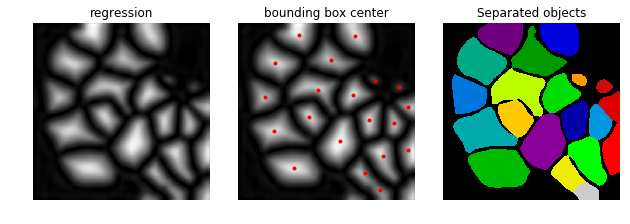

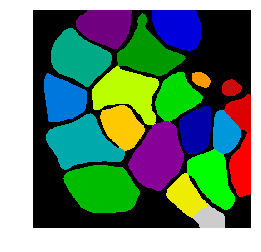

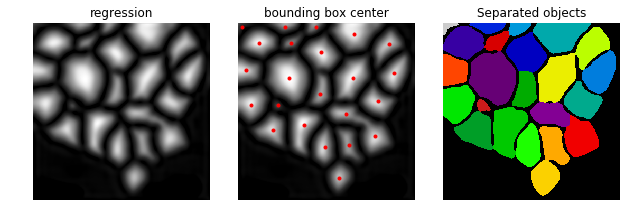

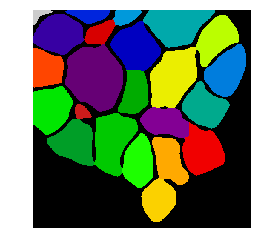

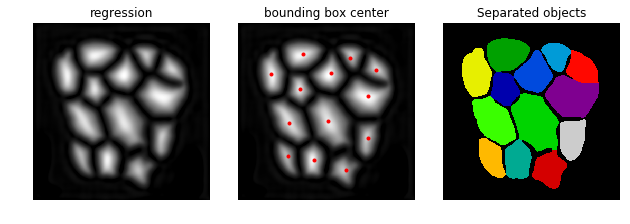

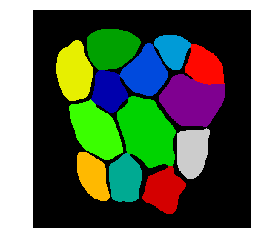

In [73]:
#--------------markers are generated with bounding box-----------
for i in range(len(img_list)):
    img=imread(ori_img_path+'/'+img_list[i])
    img_h=img.shape[0]
    img_w=img.shape[1]
    img=np.reshape(img,(img_h,img_w))
    #print(img.shape)
    ws_marker=np.zeros((img_h,img_w))
    seed_x=[]
    seed_y=[]
    seed_box=bndbox_traj[i]
    if seed_box.size>0:
        for j in range(seed_box.shape[0]):
            minr,minc,maxr,maxc=seed_box[j][:]
            
    #need reverse the dimention order,because the segmentation module is from skimage
            cx=(minc+maxc)//2
            
            cy=(minr+maxr)//2
            seed_x.append(cx)
            seed_y.append(cy)
#             print cx,cy
#             print j
            ws_marker[cx][cy]=j+1
        ws_marker=ws_marker.astype(int)
    labels = watershed(-img, ws_marker, mask=img>mask_thres)
    
    
    fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    ax[0].set_title('regression')

    ax[1].imshow(img, cmap=plt.cm.gray)
    ax[1].autoscale(False)
    ax[1].plot(seed_y[:], seed_x[:], 'r.')
    ax[1].axis('off')
    ax[1].set_title('bounding box center')

    ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
    ax[2].set_title('Separated objects')


    for a in ax:
        a.set_axis_off()
    fig.tight_layout()
    plt.show()
    
    
    if not os.path.exists(main_path+'/'+str(i)):
        os.makedirs(main_path+'/'+str(i))
    single_path=main_path+'/'+str(i)
    img_seg=scipy.misc.toimage(labels,high=np.max(labels),low=np.min(labels),mode='I')
    img_seg.save(single_path+'/'+img_list[i][0:len(img_list[i])-4]+'_wseg.png')
    
    plt.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
    plt.axis('off')        
    plt.savefig(single_path+'/'+img_list[i][0:len(img_list[i])-4]+'_ws_seg_dpi300_.tif',bbox_inches='tight',format='tif',dpi=300)
    plt.show()

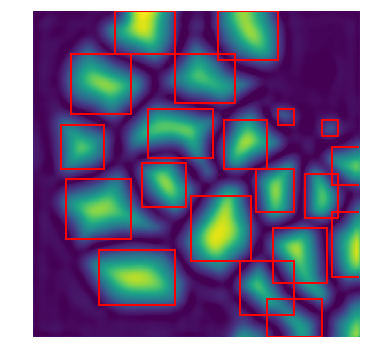

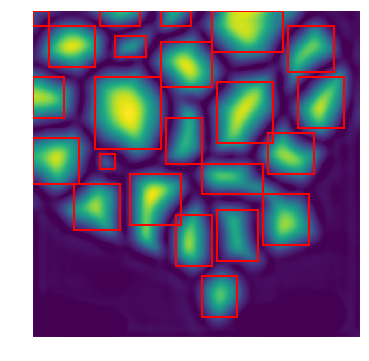

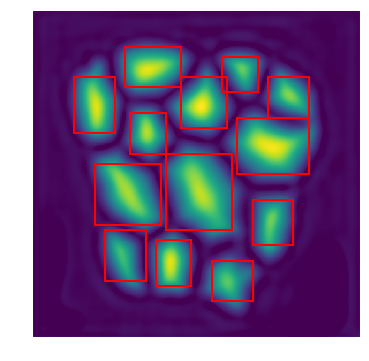

In [75]:
for i in range(len(img_list)):
    img=imread(ori_img_path+'/'+img_list[i])
    seed_box=bndbox_traj[i]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    if seed_box.size>0:
        for j in range(seed_box.shape[0]):
            minr,minc,maxr,maxc=seed_box[j][:]

            rect = mpatches.Rectangle((minr,minc),maxr-minr, maxc-minc,fill = False, edgecolor = 'red', linewidth = 2)
            ax.add_patch(rect)
            
            if not os.path.exists(main_path+'/'+str(i)):
                os.makedirs(main_path+'/'+str(i))
            single_path=main_path+'/'+str(i)
            plt.axis('off')        
            plt.savefig(single_path+'/box_predict.tif',bbox_inches='tight',format='tif',dpi=300)
    plt.show()